## Getting the Data

In [1]:
import glob

list_of_files = glob.glob('/home/rakvat/mydev/nlp_experiments/scrape_anarchist_library/en/*.txt') 
documents = {}
for filename in list_of_files:
    content = []
    f = open(filename, 'r')
    for line in f:
        content.append(line)
    f.close()
    documents[filename.split('/')[-1]] = content

## Create Pandas Dataframe

In [2]:
import pandas as pd
import re # regex

data = []
for key, value in documents.items():
    document = {}
    first_line_without_meta = 0
    for i, line in enumerate(value[:15]):
        if line.startswith('#author'):
            document['author'] = line[8:-1]
        if line.startswith('#title'):
            document['title'] = line[7:-1]
        if line.startswith('#date'):
            match = re.search('(\d\d\d\d)', line[6:-1])
            if match:
                document['year'] = match.group(0)
        if first_line_without_meta == 0 and line[0] != '#':
            first_line_without_meta = i
    document['text'] = ''.join(value[first_line_without_meta:])
    document['text_len'] = len(document['text'])
    document['file'] = key
    
    data.append(document)

df = pd.DataFrame(data) 
df.year = df.year.fillna(-1).astype(int)
df.author = df.author.fillna('unknown')
df.head()

,author,file,text,text_len,title,year
0,Colin Jenkins,colin-jenkins-americanism-personified-why-fasc...,\nWhen fascism comes to America it will be wra...,30753,Americanism Personified: Why Fascism Has Alway...,2017
1,Rob Sparrow,rob-sparrow-anarchist-politics-direct-action.m...,\n\n\nThis paper discusses Direct Action — the...,27865,Anarchist Politics & Direct Action,1997
2,Antagonism,antagonism-technoskeptic.muse.txt,\n\n\nThe meaning of technology is more and mo...,15319,Technoskeptic,-1
3,Abe Bluestein,abe-bluestein-comp-the-modern-school-movement....,\n\n*** The Modern School Movement\n\nHistoric...,76610,The Modern School Movement,1990
4,Scott Rittenhouse,scott-rittenhouse-jrotc-is-fascist.muse.txt,\n\n\n<quote>\n\n“At a mass meeting thought is...,12908,JROTC is Fascist,-1


## Explore Data

In [3]:
df.dtypes

author      object
file        object
text        object
text_len     int64
title       object
year         int64
dtype: object

In [4]:
df[df['author'] ==  'unknown']

,author,file,text,text_len,title,year
368,unknown,you-are-the-union-membership-in-the-iww.muse.txt,\n\n<em>This is an introduction if you are con...,15711,You Are the Union - Membership in the IWW,-1
801,unknown,how-liberalism-infects-movement-building.muse.txt,\n\n\nIt never fails. Every time there is crit...,5986,How Liberalism Infects Movement Building,2014
2276,unknown,anon-albania-laboratory-of-subversion.muse.txt,\n** Introduction\n\nIncontestable in its spon...,60306,"Albania, Laboratory of Subversion",-1
2856,unknown,public-grief-and-the-logic-of-war.muse.txt,\n\n\nThe past week has seen two attacks in Ca...,12805,Public Grief and the Logic of War,2014


In [5]:
df.sort_values(by='year')

,author,file,text,text_len,title,year
3086,Jason Adams,jason-adams-non-western-anarchisms.muse.txt,\n\n<em>“The future of anarchism must be appra...,96615,Non-Western Anarchisms,-1
775,Ravachol,ravachol-la-ravachole.muse.txt,\n\n\nSung to the tune of the song of the Fren...,1473,La Ravachole,-1
776,John Zerzan,john-zerzan-youth-and-regression-in-an-infanti...,\n\n\nAmong the young there are quite a few ex...,9497,Youth and Regression in an Infantile Society,-1
777,Echo,echo-iconoclastic-thoughts-on-a-savage-world.m...,\n\n<center>\n** <strong><em>Iconoclastic Thou...,18265,Iconoclastic Thoughts on a Savage World,-1
2165,Kevin Tucker,kevin-tucker-revolt-of-the-savages-primitive-r...,\n\n\nIn ‘The Rising of the Barbarians’ (<em>G...,20368,Revolt of the Savages: Primitive Revolts Again...,-1
2163,Anna Propos,anna-propos-to-the-daring-belongs-the-future-t...,\n\n\nThe anarchist movement has long fostered...,9932,To the Daring Belongs the Future: The Anarcha-...,-1
792,John Moore,john-moore-a-primitivist-primer.muse.txt,\n\n\n*** Author’s note\n\n<em> This is not a ...,20873,A Primitivist Primer,-1
793,Ted Kaczynski,ted-kaczynski-the-road-to-revolution.muse.txt,\n\n\n\n<quote>\nThe revolution is not a dinne...,15432,The Road to Revolution,-1
795,Wildcat,wildcat-outside-and-against-the-unions.muse.txt,\n\n*** Introduction\n\nThis pamphlet is writt...,28215,Outside and Against the Unions,-1
2156,Solidarity Federation,solidarity-federation-breaking-the-laws-of-lan...,\n\n\nWhy will most people never be ‘suitable’...,8422,Breaking the laws of language,-1


In [6]:
df[df['year'] > 2015]

,author,file,text,text_len,title,year
0,Colin Jenkins,colin-jenkins-americanism-personified-why-fasc...,\nWhen fascism comes to America it will be wra...,30753,Americanism Personified: Why Fascism Has Alway...,2017
22,Return Fire vol.4 (supplement),return-fire-vol-4-supplement-caught-in-the-net...,\n\nBack when this article first began coming ...,204056,Caught in the Net,2016
48,Apio Ludd,apio-ludd-godless.muse.txt,"\n\n\nAmong the various ""-ism""s that some (occ...",2822,Godless!,2018
61,Jeff Stein,jeff-stein-review-two-new-books-on-spanish-ana...,"\n\na review of\n\n<quote>\nChris Ealham, <em>...",16727,"Review, Two New Books on Spanish Anarchism",2016
71,Flower Bomb,flower-bomb-really-though-not-all-black-people...,"\n\n“And these rhymes ain’t tight, they’re ter...",15231,"Really Though, Not All ""Black"" People Give a F...",2017
83,Stuart Jan,stuart-jan-lumpenbourgeoisie.muse.txt,\n\n\nKarl Marx defined the lumpenproletariat ...,15236,Lumpenbourgeoisie,2016
139,Peter Werbe,peter-werbe-cuba.muse.txt,"\n\nOn March 15, our last day in Cuba, my wife...",11016,Cuba,2016
145,La Discordia,la-discordia-paris-imposing-moral-order-with-a...,"\n\n\n<em>‘No, we do not want to catch up with...",11921,Imposing moral order with a sledgehammer,2016
148,Vadim V. Damier,vadim-v-damier-the-spanish-revolution-of-1936....,\n\n\nEighty years have passed since the begin...,14260,The Spanish Revolution of 1936,2016
179,Anonymous,anonymous-on-social-democracy-and-elections.mu...,"\n\n<strong>It’s that time again, when after</...",6876,On Social Democracy and Elections,2016


In [7]:
import matplotlib.pyplot as plt

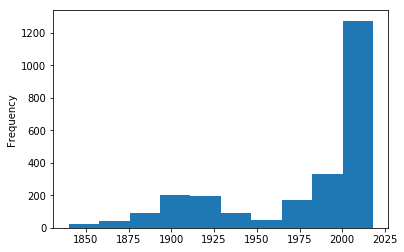

In [8]:
df['year'][df['year'] > 1799].plot.hist()

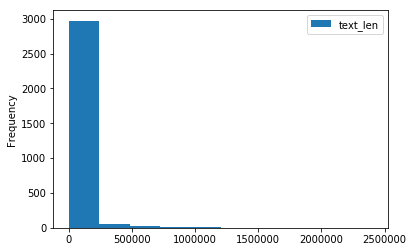

In [9]:
df[['text_len']].plot.hist()

In [10]:
df.sort_values(by='text_len').head(10)

,author,file,text,text_len,title,year
1356,Lucy E. Parsons,lucy-e-parsons-trip-east.muse.txt,\n\nTo Comrades and Friends: It is my intentio...,354,Trip East,1906
2592,Joe Hill,joe-hill-my-last-will.muse.txt,"\n<verse>\nMy will is easy to decide,\nFor the...",429,My Last Will,1915
1971,Lucy E. Parsons,lucy-e-parsons-famous-women-of-history.muse.txt,\n\nUnder the above head will be continued for...,490,Famous Women of History,1905
1709,Lucy E. Parsons,lucy-e-parsons-workers-and-war.muse.txt,\n\nThe anti-military spirit which is developi...,525,Workers and War,1917
190,Savage State,savage-state-why-you-shouldn-t-call-the-police...,\n\n\n Pigs mind their own business | Cops don...,532,Why You Shouldn’t Call the Police Pigs,-1
1659,André Veidaux,andre-veidaux-abscontrition.muse.txt,\n\n<verse>\nI have blasphemed God like a daun...,557,Abscontrition,1893
2848,Kenneth Rexroth,kenneth-rexroth-between-two-wars.muse.txt,\n\nRemember that breakfast one November —\n\n...,629,Between Two Wars,1944
1502,Lucy E. Parsons,lucy-e-parsons-our-label-the-iww-label.muse.txt,\n\n<em>The Liberator</em> is issued under the...,632,Our Label: The IWW Label,1905
1525,Ross Winn,ross-winn-america.muse.txt,\n<verse>\nAmerica! Once land of liberty\n ...,647,America,1895
1826,Ravachol,ravachol-liberte-egalite-fraternite.muse.txt,\n** Liberté – Egalité – Fraternité\n\nChildre...,680,Liberté – Egalité – Fraternité,1880


In [11]:
df.sort_values(by='text_len', ascending = False).head(10)

,author,file,text,text_len,title,year
474,Emma Goldman,emma-goldman-living-my-life.muse.txt,\n\n\n*** In Appreciation\n\nSuggestions that ...,2408507,Living My Life,1931
2160,Sophia Nachalo and Yarostan Vochek,sophia-nachalo-and-yarostan-vochek-letters-of-...,\n\n\n** Yarostan’s first letter\n\n<quote>\n\...,2212933,Letters of Insurgents,1976
2761,The Anarchist FAQ Editorial Collective,the-anarchist-faq-editorial-collective-an-anar...,\n\n\n* Appendix: The Russian Revolution\n\nT...,1457274,An Anarchist FAQ (15/17),2009
353,The Anarchist FAQ Editorial Collective,the-anarchist-faq-editorial-collective-an-anar...,\n\n\n* Section H: Why do anarchists oppose st...,1411594,An Anarchist FAQ (09/17),2009
2237,Raoul Vaneigem,raoul-vaneigem-the-resistance-to-christianity-...,\n\n\n** Translator’s Introduction\n\nIt’s unf...,1285376,The Resistance to Christianity. The Heresies a...,1993
2808,Pëtr Kropotkin,petr-kropotkin-the-great-french-revolution-178...,\n\n\n*** Preface\n\nThe more one studies the ...,1220792,The Great French Revolution 1789–1793,1909
2382,The Anarchist FAQ Editorial Collective,the-anarchist-faq-editorial-collective-an-anar...,\n\n\n* Section I: What would an anarchist soc...,1196101,An Anarchist FAQ (10/17),2009
1541,James C. Scott,james-c-scott-seeing-like-a-state.muse.txt,\n<quote>\nOWEN: What is happening?\n\nYOLLAND...,1186096,Seeing Like a State,1998
365,The Anarchist FAQ Editorial Collective,the-anarchist-faq-editorial-collective-an-anar...,\n\n\n* Section C: What are the myths of capit...,1138547,An Anarchist FAQ (04/17),2009
3081,Bob Black,bob-black-nightmares-of-reason.muse.txt,\n\n\n<quote>\n\n“The general level of insight...,1046309,Nightmares of Reason,2010


In [12]:
df[['author','file']].groupby(['author'])['author'].size().nlargest(30)

author
Anonymous                                               201
Various Authors                                          74
Lucy E. Parsons                                          65
Bob Black                                                45
Wayne Price                                              45
Emma Goldman                                             42
John Zerzan                                              40
Pëtr Kropotkin                                           39
Michail Bakunin                                          34
Alfredo M. Bonanno                                       32
James Herod                                              31
Errico Malatesta                                         30
Peter Gelderloos                                         29
Renzo Novatore                                           26
Murray Bookchin                                          24
Anonymous                                                22
Aragorn!                         

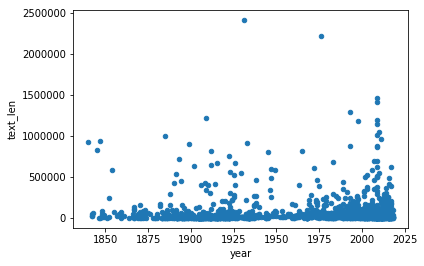

In [13]:
df[df['year'] > 1799].plot.scatter(x='year', y='text_len')